## EDA - Flight Prices

LIBRARIES IMPORT

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

READ THE FILE

In [23]:
df=pd.read_excel('flight_price.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


GET THE BASIC INFORMATION OF THE FILE

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [25]:
# ONLY FOR THE NUMERICAL COLUMN VALUES
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


## FEATURE ENGINEERING OF THE DATA

SPLIT THE DATE_OF_JOURNEY COLUMN INTO DATE, MONTH, YEAR

In [26]:
df['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10683, dtype: object

In [27]:
# SPLIT THE DATE BASED ON /
df['Date_of_Journey'].str.split('/')

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [28]:
# Split into Date, Month and Year
df['Date'] = df['Date_of_Journey'].str.split('/').str[0]
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year'] = df['Date_of_Journey'].str.split('/').str[2]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  object
 12  Month            10683 non-null  object
 13  Year             10683 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [30]:
# CONVERT THE Date, Month and Year column as int
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  int64 
 12  Month            10683 non-null  int64 
 13  Year             10683 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 1.1+ MB


In [32]:
# DROP THE COLUMN WHICH WAS ALREADY SEGREGATED - Date_of_Journey
df.drop('Date_of_Journey',axis=1,inplace=True)

In [33]:
# GET THE FIRST 2 RECORDS
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019


In [36]:
df['Arrival_Time']=df['Arrival_Time'].apply(lambda x:x.split(' ')[0])

In [38]:
# ARRIVAL HOUR
df['Arrival_Hour'] = df['Arrival_Time'].str.split(":").str[0]
# ARRIVAL MINUTES
df['Arrival_Minutes'] = df['Arrival_Time'].str.split(":").str[1]

In [41]:
# GET THE FIRST 2 RECORDS
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15


In [40]:
# DROP Arrival_Time
df.drop('Arrival_Time',axis=1,inplace=True)

In [46]:
df['Route'].str.split("→")

# SEGERATE THE TRANSIT
df['Board'] = df['Route'].str.split("→").str[0]
df['Transit_1'] = df['Route'].str.split("→").str[1]
df['Transit_2'] = df['Route'].str.split("→").str[2]
df['Final_Destn'] = df['Route'].str.split("→").str[3]

In [47]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minutes,Board,Transit_1,Transit_2,Final_Destn
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,01,10,BLR,DEL,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15,CCU,IXR,BBI,BLR


In [48]:
# DROP COLUMN ROUTE
df.drop('Route',axis=1,inplace=True)

In [ ]:
# Dep_Time Column -- Segregarion
df['Departure_hour']=df['Dep_Time'].str.split(':').str[0]
df['Departure_min']=df['Dep_Time'].str.split(':').str[1]
df['Departure_hour']=df['Departure_hour'].astype(int)
df['Departure_min']=df['Departure_min'].astype(int)
df.drop('Dep_Time',axis=1,inplace=True)
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minutes,Board,Transit_1,Transit_2,Final_Destn,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,01,10,BLR,DEL,NaN,NaN,22,20
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,13,15,CCU,IXR,BBI,BLR,5,50


In [52]:
# Total_Stops -- Segregation
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [53]:
# CHECK IF THE COLUMN IS NULL
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minutes,Board,Transit_1,Transit_2,Final_Destn,Departure_hour,Departure_min
9039,Air India,Delhi,Cochin,23h 40m,NaN,No info,7480,6,5,2019,09,25,NaN,NaN,NaN,NaN,9,45


In [54]:
# FIND THE DETAILS OF THE NULL COLUMN
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [55]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minutes,Board,Transit_1,Transit_2,Final_Destn,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,01,10,BLR,DEL,NaN,NaN,22,20
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,13,15,CCU,IXR,BBI,BLR,5,50


In [56]:
# REPLACE THE Total_Shops column in to Numeric values
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

In [57]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minutes,Board,Transit_1,Transit_2,Final_Destn,Departure_hour,Departure_min


FUNCTION FOR DURATION

def convert_duration(duration):
    hours = 0
    mins = 0
    duration = duration.replace('h', 'h ').replace('m', 'm ')
    parts = duration.strip().split()
    for part in parts:
        if 'h' in part:
            hours = int(part.replace('h', ''))
        elif 'm' in part:
            mins = int(part.replace('m', ''))
    return hours, mins

CALLED BY

df['Duration_hours'], df['Duration_mins'] = zip(*df['Duration'].apply(convert_duration))

In [62]:
# DURATION COLUMN - split
df['Duration_Hour']=df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [63]:
df['Duration_Min']=df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [65]:
df.drop('Duration',axis=1,inplace=True)
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minutes,Board,Transit_1,Transit_2,Final_Destn,Departure_hour,Departure_min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,01,10,BLR,DEL,NaN,NaN,22,20,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,15,CCU,IXR,BBI,BLR,5,50,7,25


In [66]:
df.drop('Board', axis=1, inplace=True)
df.drop('Transit_1', axis=1, inplace=True)
df.drop('Transit_2', axis=1, inplace=True)
df.drop('Final_Destn', axis=1, inplace=True)

In [67]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minutes,Departure_hour,Departure_min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,01,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,15,5,50,7,25


## ENCODING

In [ ]:
# CHECK FOR UNIQUE
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [69]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [70]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [71]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
pip install scikit-learn

In [74]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()

In [75]:
encoder.fit_transform(df[["Airline","Source","Destination"]]).toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]], shape=(10683, 23))

In [76]:
pd.DataFrame(encoder.fit_transform(df[['Airline','Source','Destination']]).toarray(),columns=encoder.get_feature_names_out())

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10679,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10680,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [77]:
df2 = pd.get_dummies(df[['Airline', 'Source', 'Destination', 'Additional_Info']], drop_first=True)

In [80]:
df2.head(2)

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,False,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [81]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minutes,Departure_hour,Departure_min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,01,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,15,5,50,7,25


In [82]:
df1 = df.drop(['Airline', 'Source', 'Destination', 'Additional_Info'], axis=1)

In [83]:
df1.head(2)

,Total_Stops,Price,Date,Month,Year,Arrival_Hour,Arrival_Minutes,Departure_hour,Departure_min,Duration_Hour,Duration_Min
0,0,3897,24,3,2019,01,10,22,20,2,50
1,2,7662,1,5,2019,13,15,5,50,7,25


In [84]:
df2.head(2)

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,False,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [85]:
final_df = pd.concat([df1.reset_index(drop=True), df2.reset_index(drop=True)], axis=1)


In [86]:
final_df.head(2)

,Total_Stops,Price,Date,Month,Year,Arrival_Hour,Arrival_Minutes,Departure_hour,Departure_min,Duration_Hour,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,3897,24,3,2019,01,10,22,20,2,...,True,False,False,False,False,False,False,False,True,False
1,2,7662,1,5,2019,13,15,5,50,7,...,False,False,False,False,False,False,False,False,True,False


In [90]:
final_df

,Total_Stops,Price,Date,Month,Year,Arrival_Hour,Arrival_Minutes,Departure_hour,Departure_min,Duration_Hour,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,3897,24,3,2019,01,10,22,20,2,...,True,False,False,False,False,False,False,False,True,False
1,2,7662,1,5,2019,13,15,5,50,7,...,False,False,False,False,False,False,False,False,True,False
2,2,13882,9,6,2019,04,25,9,25,19,...,False,False,False,False,False,False,False,False,True,False
3,1,6218,12,5,2019,23,30,18,5,5,...,False,False,False,False,False,False,False,False,True,False
4,1,13302,1,3,2019,21,35,16,50,4,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,2019,22,25,19,55,2,...,False,False,False,False,False,False,False,False,True,False
10679,0,4145,27,4,2019,23,20,20,45,2,...,False,False,False,False,False,False,False,False,True,False
10680,0,7229,27,4,2019,11,20,8,20,3,...,False,False,False,False,False,False,False,False,True,False
10681,0,12648,1,3,2019,14,10,11,30,2,...,True,False,False,False,False,False,False,False,True,False


Distribution of target variable (Price)

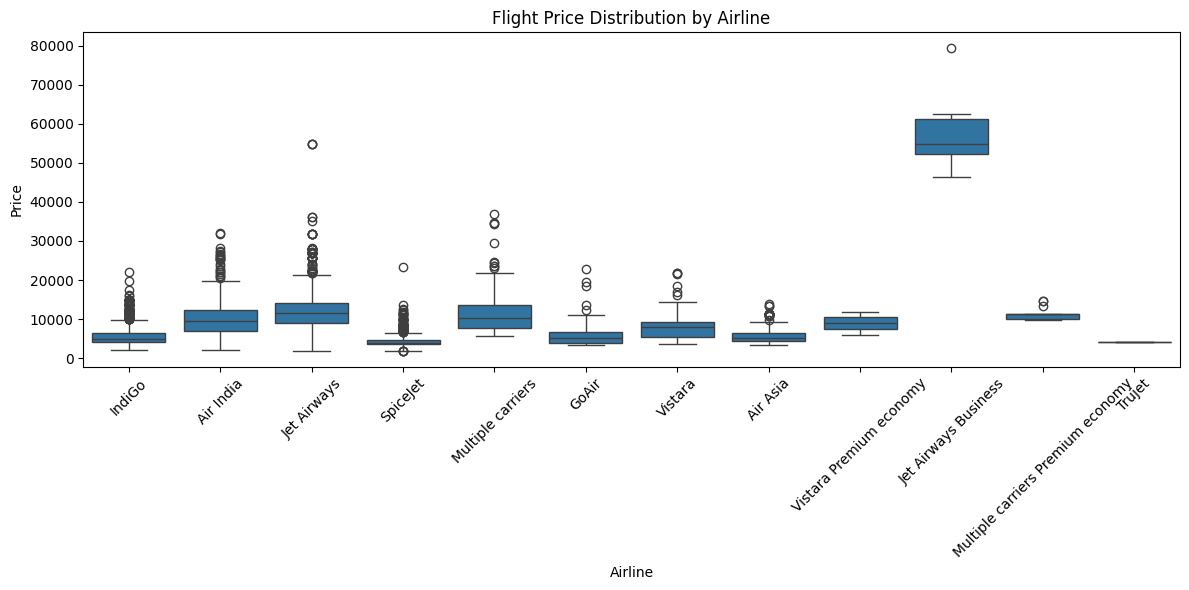

In [87]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Airline', y='Price', data=df)
plt.xticks(rotation=45)
plt.title('Flight Price Distribution by Airline')
plt.ylabel('Price')
plt.xlabel('Airline')
plt.tight_layout()
plt.show()

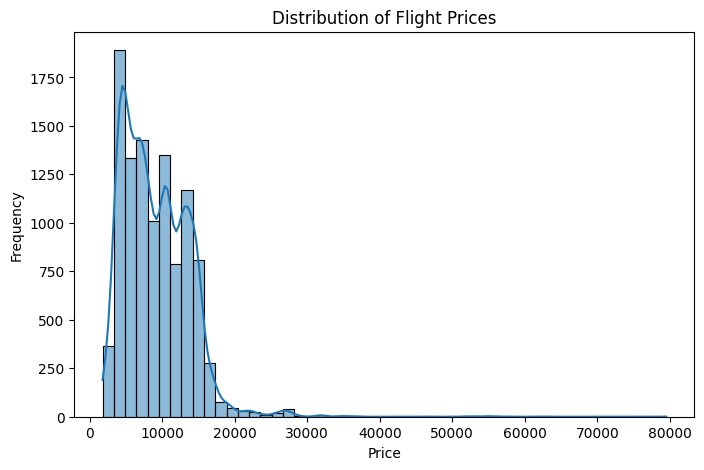

In [88]:
plt.figure(figsize=(8, 5))
sns.histplot(final_df['Price'], kde=True, bins=50)
plt.title("Distribution of Flight Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

Correlation heatmap for numerical features

In [93]:
plt.figure(figsize=(12, 8))
sns.heatmap(df1.corr(), annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size":10})
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

ValueError: could not convert string to float: '5m'

<Figure size 1200x800 with 0 Axes>

In [96]:
matching_columns = [col for col in df1.columns if df[col].astype(str).eq('5m').any()]

print("Columns containing '5m':", matching_columns)

Columns containing '5m': ['Duration_Hour']


In [98]:
df1['Duration_Hour'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [99]:
rows_with_5m = df1[df1.apply(lambda row: row.astype(str).eq('5m').any(), axis=1)]

print(rows_with_5m)

      Total_Stops  Price  Date  Month  Year Arrival_Hour Arrival_Minutes  \
6474            2  17327     6      3  2019           16              55   

      Departure_hour  Departure_min Duration_Hour Duration_Min  
6474              16             50            5m          NaN  


In [ ]:
df1 = df1.applymap(lambda x: float(x.replace('m', '')) if isinstance(x, str) and x.endswith('m') else x)

In [100]:
df1['Duration_Hour'] = df['Duration_Hour'].str.replace('m', '').astype(float)

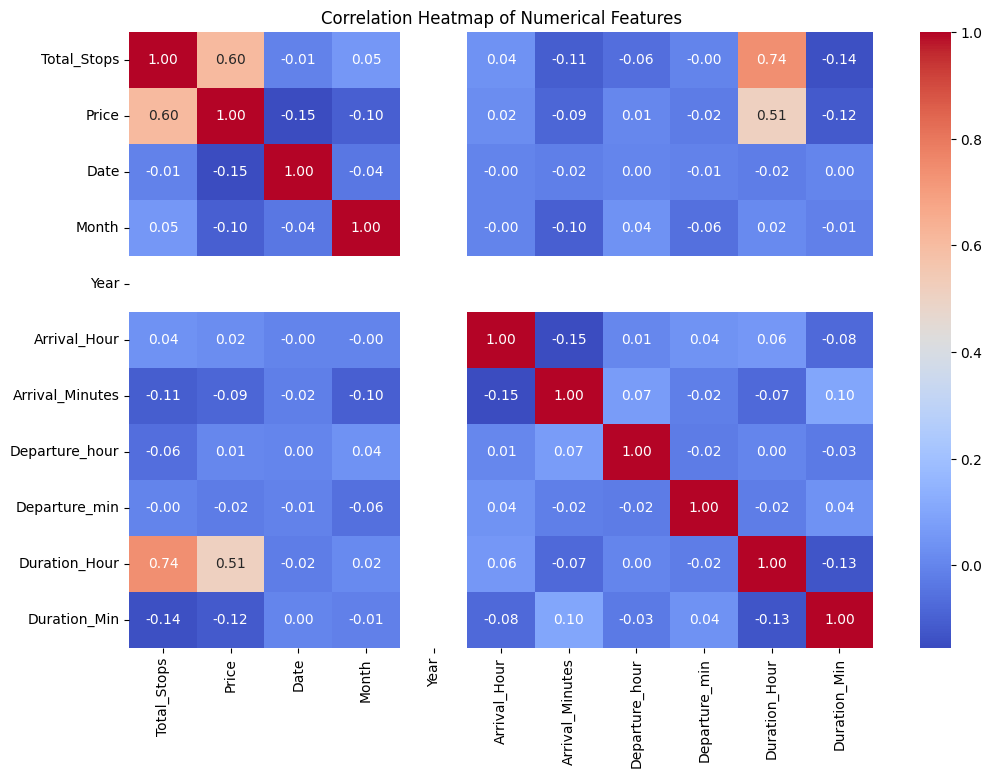

In [101]:
plt.figure(figsize=(12, 8))
sns.heatmap(df1.corr(), annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size":10})
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

Boxplot for Total_Stops vs Price

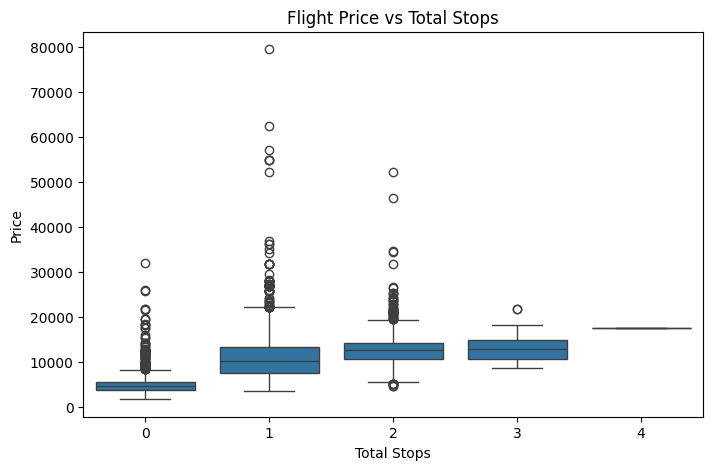

In [102]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Total_Stops', y='Price', data=final_df)
plt.title("Flight Price vs Total Stops")
plt.xlabel("Total Stops")
plt.ylabel("Price")
plt.show()

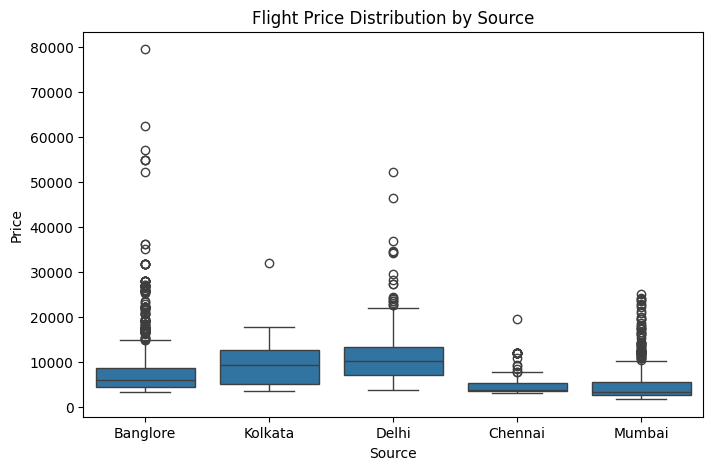

In [103]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Source', y='Price', data=df)
plt.title("Flight Price Distribution by Source")
plt.xlabel("Source")
plt.ylabel("Price")
plt.show()

In [105]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minutes,Departure_hour,Departure_min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,01,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,15,5,50,7,25


In [111]:
df['Duration_Hour'] * 60 + df['Duration_Min'], df['Price']

(0        2222222222222222222222222222222222222222222222...
 1        7777777777777777777777777777777777777777777777...
 2                                                      NaN
 3        5555555555555555555555555555555555555555555555...
 4        4444444444444444444444444444444444444444444444...
                                ...                        
 10678    2222222222222222222222222222222222222222222222...
 10679    2222222222222222222222222222222222222222222222...
 10680                                                  NaN
 10681    2222222222222222222222222222222222222222222222...
 10682    8888888888888888888888888888888888888888888888...
 Length: 10683, dtype: object,
 0         3897
 1         7662
 2        13882
 3         6218
 4        13302
          ...  
 10678     4107
 10679     4145
 10680     7229
 10681    12648
 10682    11753
 Name: Price, Length: 10683, dtype: int64)

TypeError: 'value' must be an instance of str or bytes, not a float

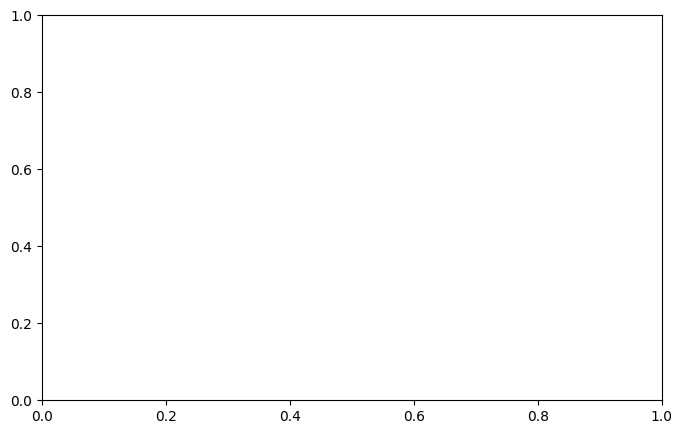

In [112]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Duration_Hour'] * 60 + df['Duration_Min'], df['Price'], alpha=0.3)
plt.title("Impact of Flight Duration on Price")
plt.xlabel("Duration (minutes)")
plt.ylabel("Price")
plt.show()

In [114]:
for col in df.columns:
    if df[col].astype(str).str.contains('m').any():
        print(f"'m' found in column: {col}")

'm' found in column: Airline
'm' found in column: Source
'm' found in column: Additional_Info
'm' found in column: Duration_Hour


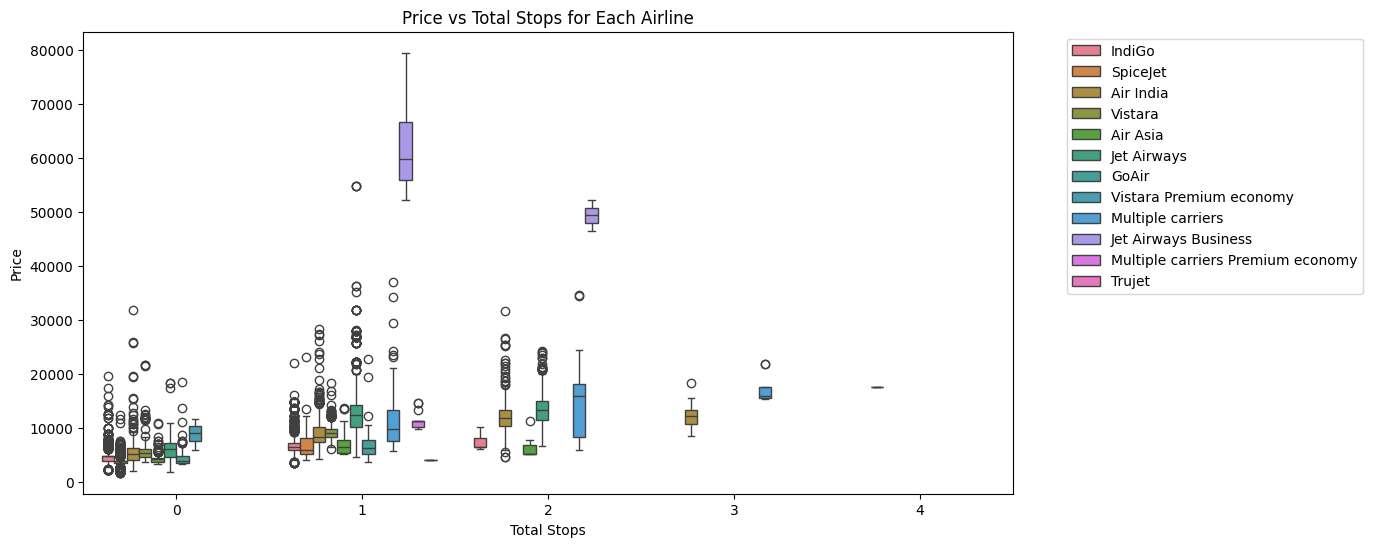

In [121]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Total_Stops', y='Price', hue='Airline', data=df)
plt.title("Price vs Total Stops for Each Airline")
plt.xlabel("Total Stops")
plt.ylabel("Price")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

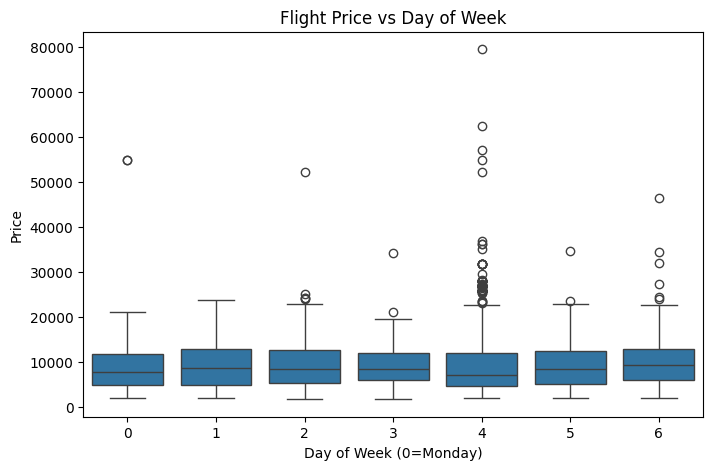

In [122]:
df['DayOfWeek'] = pd.to_datetime(df['Date'].astype(str) + '-' + df['Month'].astype(str) + '-' + df['Year'].astype(str), dayfirst=True).dt.dayofweek
plt.figure(figsize=(8, 5))
sns.boxplot(x='DayOfWeek', y='Price', data=df)
plt.title("Flight Price vs Day of Week")
plt.xlabel("Day of Week (0=Monday)")
plt.ylabel("Price")
plt.show()

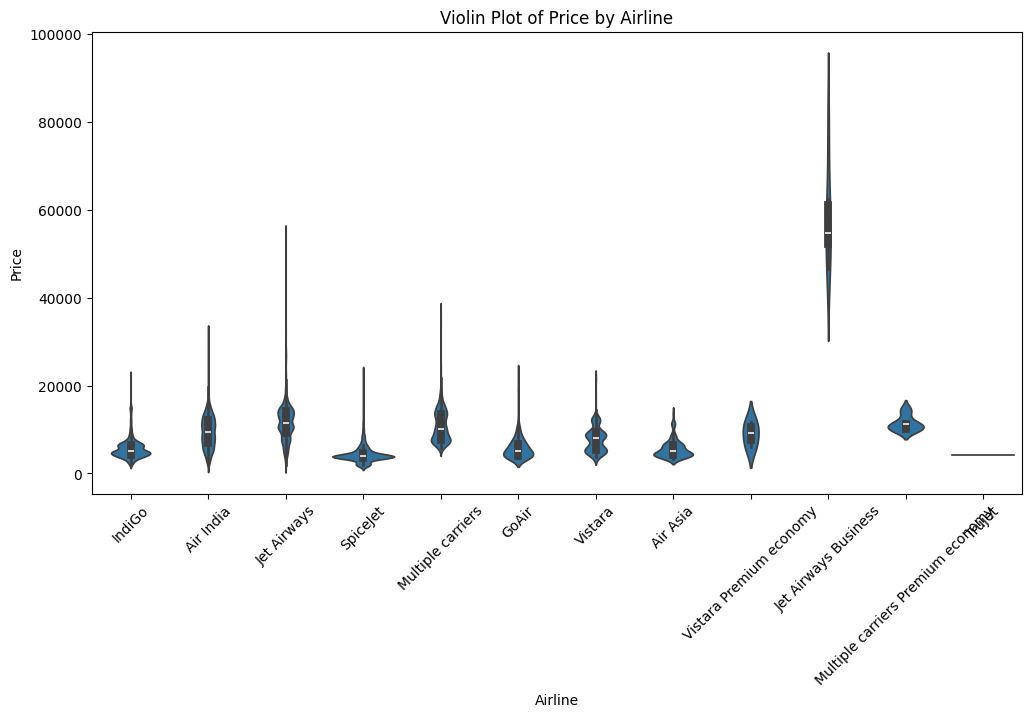

In [123]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Airline', y='Price', data=df)
plt.title("Violin Plot of Price by Airline")
plt.xlabel("Airline")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()